## Delay Model

### Load the Cleaned Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [2]:
df = pd.read_csv("data/flight_cleaned.csv")

In [3]:
df.shape
df.describe()

,DOT_CODE,FL_NUMBER,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,...,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,IS_DELAYED
count,2.743569e+06,2.743569e+06,2.743569e+06,2.672518e+06,2.672489e+06,2.671419e+06,2.671419e+06,2.671113e+06,2.671113e+06,2.743569e+06,...,2.743556e+06,2.671113e+06,2.671113e+06,2.743569e+06,489609.000000,489609.000000,489609.000000,489609.000000,489609.000000,2.743569e+06
mean,1.997615e+04,2.511652e+03,1.327051e+03,1.329676e+03,1.008764e+01,1.663598e+01,1.352248e+03,1.462388e+03,7.672824e+00,1.490414e+03,...,1.422383e+02,1.366284e+02,1.123201e+02,8.090896e+02,24.761836,3.992271,13.154531,0.144944,25.502270,1.722716e-01
std,3.773337e+02,1.746954e+03,4.859815e+02,4.994175e+02,4.919482e+01,9.185272e+00,5.009845e+02,5.269459e+02,6.248624e+00,5.116181e+02,...,7.154169e+01,7.167953e+01,6.976019e+01,5.878244e+02,71.778414,32.570476,33.092552,3.588439,55.983639,3.776164e-01
min,1.939300e+04,1.000000e+00,1.000000e+00,1.000000e+00,-8.900000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.800000e+01,1.500000e+01,8.000000e+00,2.900000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,1.979000e+04,1.051000e+03,9.150000e+02,9.160000e+02,-6.000000e+00,1.100000e+01,9.310000e+02,1.049000e+03,4.000000e+00,1.107000e+03,...,9.000000e+01,8.400000e+01,6.100000e+01,3.770000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
50%,1.993000e+04,2.153000e+03,1.320000e+03,1.323000e+03,-2.000000e+00,1.400000e+01,1.335000e+03,1.501000e+03,6.000000e+00,1.516000e+03,...,1.250000e+02,1.200000e+02,9.500000e+01,6.510000e+02,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
75%,2.036800e+04,3.796000e+03,1.730000e+03,1.739000e+03,6.000000e+00,1.900000e+01,1.752000e+03,1.908000e+03,9.000000e+00,1.919000e+03,...,1.720000e+02,1.670000e+02,1.420000e+02,1.046000e+03,23.000000,0.000000,17.000000,0.000000,30.000000,0.000000e+00
max,2.045200e+04,9.562000e+03,2.359000e+03,2.400000e+03,2.966000e+03,1.840000e+02,2.400000e+03,2.400000e+03,2.490000e+02,2.400000e+03,...,7.050000e+02,7.390000e+02,6.920000e+02,5.812000e+03,2934.000000,1653.000000,1741.000000,1185.000000,2557.000000,1.000000e+00


In [4]:
df.columns

Index(['FL_DATE', 'AIRLINE', 'AIRLINE_DOT', 'AIRLINE_CODE', 'DOT_CODE',
       'FL_NUMBER', 'ORIGIN', 'ORIGIN_CITY', 'DEST', 'DEST_CITY',
       'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'DELAY_DUE_CARRIER',
       'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS', 'DELAY_DUE_SECURITY',
       'DELAY_DUE_LATE_AIRCRAFT', 'IS_DELAYED'],
      dtype='object')

In [5]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,IS_DELAYED
0,2020-09-23,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,2006,DAL,"Dallas, TX",ABQ,"Albuquerque, NM",...,110.0,98.0,84.0,580.0,NaN,NaN,NaN,NaN,NaN,0
1,2020-03-02,Republic Airline,Republic Airline: YX,YX,20452,4386,PWM,"Portland, ME",PHL,"Philadelphia, PA",...,101.0,108.0,77.0,364.0,NaN,NaN,NaN,NaN,NaN,0
2,2019-02-19,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,544,BNA,"Nashville, TN",ATL,"Atlanta, GA",...,70.0,55.0,38.0,214.0,NaN,NaN,NaN,NaN,NaN,0
3,2019-12-21,Alaska Airlines Inc.,Alaska Airlines Inc.: AS,AS,19930,1622,SEA,"Seattle, WA",SJC,"San Jose, CA",...,139.0,NaN,NaN,696.0,NaN,NaN,NaN,NaN,NaN,0
4,2021-06-13,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2486,DCA,"Washington, DC",ATL,"Atlanta, GA",...,111.0,109.0,82.0,547.0,NaN,NaN,NaN,NaN,NaN,0


### Time-based Feature Engineering

In [6]:
# Extract features like year, month, day, day of week from flight date

df['FL_DATE'] = pd.to_datetime(df['FL_DATE'])
df['YEAR'] = df['FL_DATE'].dt.year
df['MONTH'] = df['FL_DATE'].dt.month
df['DAY'] = df['FL_DATE'].dt.day
df['DAY_OF_WEEK'] = df['FL_DATE'].dt.dayofweek  # 0=Mon, 6=Sun

In [7]:
# Create Delay Flags (Target for Delay Model)

df['DEP_DELAY_15'] = (df['DEP_DELAY'] > 15).astype(int)
df['ARR_DELAY_15'] = (df['ARR_DELAY'] > 15).astype(int)

In [8]:
# Binary Features (Optional Enhancements)

df['LONG_AIR_TIME'] = (df['AIR_TIME'] > df['AIR_TIME'].median()).astype(int)
df['NIGHT_FLIGHT'] = ((df['DEP_TIME'] >= 2000) | (df['DEP_TIME'] <= 600)).astype(int)

**Encode Categorical Features**

Columns: AIRLINE, ORIGIN, DEST
We’ll choose Label Encoding for both models because we’ll use tree-based models (Random Forest / XGBoost) which work well with label encoding.

In [9]:
from sklearn.preprocessing import LabelEncoder

cat_cols = ['AIRLINE', 'ORIGIN', 'DEST']
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

In [10]:
# Drop Unnecessary or Leaky Columns

df.drop(columns=[
    'FL_DATE',                 # Already decomposed
    'CANCELLATION_CODE',       # Mostly null
    'ARR_DELAY', 'DEP_DELAY',  # Used to create binary labels
    'WHEELS_OFF', 'WHEELS_ON', 'TAXI_OUT', 'TAXI_IN',  # Real-time post-takeoff
    'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT',
    'DEP_TIME', 'ARR_TIME'     # Real-time post-departure
], inplace=True)

In [11]:
# Drop rows with missing AIR_TIME or ELAPSED_TIME (crucial inputs)
df.dropna(subset=['AIR_TIME', 'ELAPSED_TIME', 'CRS_ELAPSED_TIME'], inplace=True)

In [12]:
# Final Null & Dtype Check

print("✅ Final shape:", df.shape)
print("✅ Missing values:\n", df.isnull().sum())

✅ Final shape: (2671113, 26)
✅ Missing values:
 AIRLINE             0
AIRLINE_DOT         0
AIRLINE_CODE        0
DOT_CODE            0
FL_NUMBER           0
ORIGIN              0
ORIGIN_CITY         0
DEST                0
DEST_CITY           0
CRS_DEP_TIME        0
CRS_ARR_TIME        0
CANCELLED           0
DIVERTED            0
CRS_ELAPSED_TIME    0
ELAPSED_TIME        0
AIR_TIME            0
DISTANCE            0
IS_DELAYED          0
YEAR                0
MONTH               0
DAY                 0
DAY_OF_WEEK         0
DEP_DELAY_15        0
ARR_DELAY_15        0
LONG_AIR_TIME       0
NIGHT_FLIGHT        0
dtype: int64


In [13]:
# Export Final Feature Dataset

df.to_csv("data/flight_features.csv", index=False)
print("✅ Feature engineered dataset saved: flight_features.csv")

✅ Feature engineered dataset saved: flight_features.csv


In [14]:
import sys
print(sys.executable)
!python --version

C:\Users\sweet\Desktop\DataScience\Github projects\Case Study-Blog-Articles-Competitions\Online Competitions\DevPost\RevenueCat-Shipaton\.venv\Scripts\python.exe
Python 3.12.7


---------

### ML Modeling Plan

In [15]:
# Load Final Feature File

import pandas as pd

df = pd.read_csv("data/flight_features.csv")

In [16]:
print(df.shape)
df.head()

(2671113, 26)


,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,...,DISTANCE,IS_DELAYED,YEAR,MONTH,DAY,DAY_OF_WEEK,DEP_DELAY_15,ARR_DELAY_15,LONG_AIR_TIME,NIGHT_FLIGHT
0,15,Southwest Airlines Co.: WN,WN,19393,2006,93,"Dallas, TX",2,"Albuquerque, NM",1550,...,580.0,0,2020,9,23,2,0,0,0,0
1,13,Republic Airline: YX,YX,20452,4386,296,"Portland, ME",275,"Philadelphia, PA",1819,...,364.0,0,2020,3,2,0,0,0,0,0
2,15,Southwest Airlines Co.: WN,WN,19393,544,47,"Nashville, TN",23,"Atlanta, GA",540,...,214.0,0,2019,2,19,1,0,0,0,1
3,3,Delta Air Lines Inc.: DL,DL,19790,2486,96,"Washington, DC",23,"Atlanta, GA",815,...,547.0,0,2021,6,13,6,0,0,0,0
4,10,JetBlue Airways: B6,B6,20409,2269,49,"Boston, MA",131,"Fort Lauderdale, FL",1303,...,1237.0,0,2020,2,23,6,0,0,1,0


In [17]:
# Features: Remove leakage and ID-like columns
drop_cols = [
    'CANCELLED', 'DEP_DELAY_15', 'ARR_DELAY_15',  # targets
    'AIRLINE_DOT', 'AIRLINE_CODE', 'ORIGIN_CITY', 'DEST_CITY'  # redundant text
]

X_delay = df.drop(columns=drop_cols)
y_delay = df['DEP_DELAY_15']

In [18]:
# Delay model split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(
    X_delay, y_delay, test_size=0.25, random_state=99, stratify=y_delay
)

print("✅ Delay model:", X_train_d.shape, X_test_d.shape)

✅ Delay model: (2003334, 19) (667779, 19)


In [19]:
# ✅ Step 1 (for Delay model): Check class distribution
print("Train labels (0=on-time, 1=delayed):", np.bincount(y_train_d))
print("Test labels  (0=on-time, 1=delayed):", np.bincount(y_test_d))

Train labels (0=on-time, 1=delayed): [1652006  351328]
Test labels  (0=on-time, 1=delayed): [550670 117109]


In [20]:
# Save delay model data
joblib.dump((X_train_d, X_test_d, y_train_d, y_test_d), "model/delay_model_data.pkl")
print("✅ Delay model data saved.")

✅ Delay model data saved.


### Train the Delay model

**Flight Delay Model**

→ RandomForestClassifier                                          
→ Target: DEP_DELAY_15

In [21]:
# Load data
import joblib

# Load delay model data
X_train_d, X_test_d, y_train_d, y_test_d = joblib.load("model/delay_model_data.pkl")

In [22]:
# Initialize and Train Model

from sklearn.ensemble import RandomForestClassifier

# Initialize RandomForest for delay prediction
rf_delay = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    random_state=42,
    class_weight='balanced'
)

# Train
rf_delay.fit(X_train_d, y_train_d)

RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [23]:
# Predict and Evaluate

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict
y_pred_d = rf_delay.predict(X_test_d)

In [24]:
# Evaluate
print("🔍 Flight Delay Model — Evaluation")
print(confusion_matrix(y_test_d, y_pred_d, labels=[0, 1]))
print(classification_report(y_test_d, y_pred_d))
print("✅ Accuracy:", accuracy_score(y_test_d, y_pred_d))

🔍 Flight Delay Model — Evaluation
[[524787  25883]
 [ 23022  94087]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96    550670
           1       0.78      0.80      0.79    117109

    accuracy                           0.93    667779
   macro avg       0.87      0.88      0.87    667779
weighted avg       0.93      0.93      0.93    667779

✅ Accuracy: 0.9267646931095467


In [26]:
# Save trained model
joblib.dump(rf_delay, "model/rf_delay_model.pkl")

# Save feature order for API consistency
pd.Series(X_delay.columns).to_csv("model/delay_feature_order.csv", index=False, header=False)

print("✅ Saved: model/rf_delay_model.pkl and model/delay_feature_order.csv")

✅ Saved: model/rf_delay_model.pkl and model/delay_feature_order.csv


----

In [1]:
# --- DELAY MODEL EXPLAINABILITY ---
import os, pandas as pd, numpy as np, joblib, matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
from sklearn.model_selection import train_test_split

os.makedirs("reports/figures", exist_ok=True)
os.makedirs("reports/tables", exist_ok=True)

In [2]:
# === CONFIG: point to the model you’re explaining ===
DELAY_MODEL_PATH = "model/rf_delay_model.pkl"
FEATURE_DATA_PATH = "data/flight_features.csv"

In [3]:
# Load engineered features
df = pd.read_csv("data/flight_features.csv")

In [4]:
# Target
y = df["DEP_DELAY_15"].astype(int)

In [5]:
# Drop targets, text IDs, and ALL leakage
drop_cols = [
    "CANCELLED", "DEP_DELAY_15", "ARR_DELAY_15",
    "AIRLINE_DOT", "AIRLINE_CODE", "ORIGIN_CITY", "DEST_CITY",
    "AIR_TIME", "ELAPSED_TIME", "CRS_ELAPSED_TIME", "IS_DELAYED",
    "WHEELS_OFF", "WHEELS_ON", "TAXI_OUT", "TAXI_IN",
    "DEP_TIME", "ARR_TIME",
]
X_clean = df.drop(columns=[c for c in drop_cols if c in df.columns])

In [6]:
# Train/test split (just for permutation importance and PD/ICE)
X_tr, X_te, y_tr, y_te = train_test_split(
    X_clean, y, test_size=0.25, stratify=y, random_state=99
)

In [7]:
rf_delay_clean = RandomForestClassifier(
    n_estimators=300, max_depth=12, class_weight="balanced", random_state=42
).fit(X_tr, y_tr)

NameError: name 'RandomForestClassifier' is not defined

In [ ]:
import pandas as pd, joblib, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load engineered features
df = pd.read_csv("data/flight_features.csv")

# Target
y = df["DEP_DELAY_15"].astype(int)

# Drop targets, text IDs, and ALL leakage
drop_cols = [
    "CANCELLED", "DEP_DELAY_15", "ARR_DELAY_15",
    "AIRLINE_DOT", "AIRLINE_CODE", "ORIGIN_CITY", "DEST_CITY",
    "AIR_TIME", "ELAPSED_TIME", "CRS_ELAPSED_TIME", "IS_DELAYED",
    "WHEELS_OFF", "WHEELS_ON", "TAXI_OUT", "TAXI_IN",
    "DEP_TIME", "ARR_TIME",
]
X_clean = df.drop(columns=[c for c in drop_cols if c in df.columns])

X_tr, X_te, y_tr, y_te = train_test_split(
    X_clean, y, test_size=0.25, stratify=y, random_state=99
)

rf_delay_clean = RandomForestClassifier(
    n_estimators=300, max_depth=12, class_weight="balanced", random_state=42
).fit(X_tr, y_tr)

print(classification_report(y_te, rf_delay_clean.predict(X_te)))
print("Accuracy:", accuracy_score(y_te, rf_delay_clean.predict(X_te)))

# Save clean model + exact feature order
joblib.dump(rf_delay_clean, "model/rf_delay_model_fixed.pkl")
pd.Series(X_clean.columns).to_csv("model/delay_feature_order_fixed.csv", index=False, header=False)
print("✅ Saved: model/rf_delay_model_fixed.pkl + model/delay_feature_order_fixed.csv")

In [1]:
import os, joblib, shap, numpy as np, pandas as pd, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance, PartialDependenceDisplay

os.makedirs("reports/figures", exist_ok=True)
os.makedirs("reports/tables", exist_ok=True)

DELAY_MODEL_PATH = "model/rf_delay_model_fixed.pkl"
FEATURE_DATA_PATH = "data/flight_features.csv"
FEATURE_ORDER_CSV = "model/delay_feature_order_fixed.csv"

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [2]:
df = pd.read_csv(FEATURE_DATA_PATH)
feature_names = pd.read_csv(FEATURE_ORDER_CSV, header=None).iloc[:,0].tolist()
X = df[feature_names].copy()
y = df["DEP_DELAY_15"].astype(int)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.25, random_state=99
)

In [4]:
rf_delay = joblib.load(DELAY_MODEL_PATH)

In [5]:
# 1) Gini
gini_tbl = (pd.DataFrame({"feature": feature_names,
                          "gini_importance": rf_delay.feature_importances_})
            .sort_values("gini_importance", ascending=False).reset_index(drop=True))
gini_tbl.to_csv("reports/tables/delay_clean_feature_importance_gini.csv", index=False)

plt.figure(figsize=(8,7))
g_top = gini_tbl.head(20)[::-1]
plt.barh(g_top["feature"], g_top["gini_importance"])
plt.title("Delay (clean) — Gini Top 20"); plt.tight_layout()
plt.savefig("reports/figures/delay_clean_fi_gini_top20.png", dpi=200); plt.close()

In [6]:
# 2) Permutation
perm = permutation_importance(rf_delay, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
perm_tbl = (pd.DataFrame({"feature": feature_names,
                          "perm_importance_mean": perm.importances_mean,
                          "perm_importance_std": perm.importances_std})
            .sort_values("perm_importance_mean", ascending=False).reset_index(drop=True))
perm_tbl.to_csv("reports/tables/delay_clean_feature_importance_permutation.csv", index=False)

In [7]:
plt.figure(figsize=(8,7))
p_top = perm_tbl.head(20)[::-1]
plt.barh(p_top["feature"], p_top["perm_importance_mean"])
plt.title("Delay (clean) — Permutation Top 20"); plt.tight_layout()
plt.savefig("reports/figures/delay_clean_fi_permutation_top20.png", dpi=200); plt.close()

In [8]:
# ============================================================
# Explainability bundle: Delay (clean/leakage-free) + Cancellation
# - Gini & Permutation importances
# - SHAP global (beeswarm + bar)
# - SHAP local waterfalls (first delayed + first on-time example)
# - PD + ICE for top 6 permutation features (binary-safe)
# Outputs -> reports/figures/* and reports/tables/*
# ============================================================

import os, glob, numpy as np, pandas as pd, joblib, matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance, PartialDependenceDisplay
import shap

# -------------------
# Paths (edit if needed)
# -------------------
# Delay (clean, leakage-free)
DELAY_MODEL_PATH = "model/rf_delay_model_fixed.pkl"
DELAY_FEATURE_ORDER_CSV = "model/delay_feature_order_fixed.csv"  # produced at training
FEATURE_DATA_PATH = "data/flight_features.csv"                   # source for delay features + label

# Cancellation (already cleaned in your pipeline)
CANCEL_MODEL_PATH = "model/rf_cancel_model_fixed.pkl"
# The explainer expects this file to have CANCELLED; and the code will look for: cancel_feature_names + ["CANCELLED"]
CANCEL_FEATURE_SAMPLE_CSV = "data/flight_cancel_features.csv"    # used to infer columns + label

# Output dirs
os.makedirs("reports/figures", exist_ok=True)
os.makedirs("reports/tables", exist_ok=True)

# -------------------
# Helper: robust SHAP waterfall (handles SHAP version quirks)
# -------------------
def plot_shap_waterfall(idx, explainer, X_test, feature_names, out_prefix):
    x_row = X_test.loc[[idx]]
    sv = explainer.shap_values(x_row)

    # pick positive class and flatten
    if isinstance(sv, list):  # TreeExplainer on RF often returns [class0, class1]
        values = np.asarray(sv[1]).reshape(-1)
        base = np.asarray(explainer.expected_value[1]).reshape(-1)
    else:
        values = np.asarray(sv).reshape(-1)
        base = np.asarray(explainer.expected_value).reshape(-1)

    base_scalar = float(base[0])

    exp = shap.Explanation(
        values=values,
        base_values=base_scalar,
        data=x_row.values[0],
        feature_names=feature_names
    )

    try:
        shap.plots.waterfall(exp, max_display=15, show=False)  # newer API
    except Exception:
        shap.waterfall_plot(exp, max_display=15, show=False)   # older alias

    plt.title(f"{out_prefix} — SHAP Waterfall {idx}")
    plt.tight_layout()
    out_path = f"reports/figures/{out_prefix}_shap_waterfall_{idx}.png"
    plt.savefig(out_path, dpi=200, bbox_inches='tight'); plt.close()
    print(f"✅ saved {out_path}")

# -------------------
# Helper: safer PD/ICE (handles binary/constant features)
# -------------------
def safe_pd_ice(estimator, X_test, feature, prefix):
    # Skip constant features
    if X_test[feature].nunique(dropna=False) < 2:
        print(f"ℹ️ {prefix}: Skipping {feature} (constant in test split).")
        return
    try:
        if X_test[feature].nunique() == 2:
            # Binary feature: average-only and 2-point grid
            PartialDependenceDisplay.from_estimator(
                estimator, X_test, [feature],
                kind='average', grid_resolution=2
            )
        else:
            # Continuous: PD + ICE
            PartialDependenceDisplay.from_estimator(
                estimator, X_test, [feature],
                kind='both', subsample=5000, grid_resolution=30
            )
        plt.title(f"{prefix} — PD & ICE: {feature}")
        plt.tight_layout()
        out = f"reports/figures/{prefix}_pd_ice_{feature}.png"
        plt.savefig(out, dpi=200, bbox_inches='tight'); plt.close()
    except Exception as e:
        print(f"⚠️ {prefix}: Skipped PD/ICE for {feature}: {e}")

# -------------------
# Helper: one-model explainability pipeline
# -------------------
def run_explainability(model_path, feature_names, df, target_col, prefix):
    print(f"\n==== {prefix}: loading model & aligning data ====")
    model = joblib.load(model_path)

    # Align features strictly to the saved list
    missing = [c for c in feature_names if c not in df.columns]
    if missing:
        raise ValueError(f"{prefix}: Missing expected features in data: {missing}")
    X = df[feature_names].copy()
    y = df[target_col].astype(int)

    # Split for eval/perm/PD-ICE
    X_tr, X_te, y_tr, y_te = train_test_split(
        X, y, stratify=y, test_size=0.25, random_state=99
    )

    # 1) Gini importance
    print(f"{prefix}: computing Gini importances…")
    gini_tbl = (pd.DataFrame({
        "feature": feature_names,
        "gini_importance": model.feature_importances_
    }).sort_values("gini_importance", ascending=False).reset_index(drop=True))
    gini_tbl.to_csv(f"reports/tables/{prefix}_feature_importance_gini.csv", index=False)

    plt.figure(figsize=(8,7))
    g_top = gini_tbl.head(20)[::-1]
    plt.barh(g_top["feature"], g_top["gini_importance"])
    plt.title(f"{prefix} — Gini Importance (Top 20)")
    plt.tight_layout(); plt.savefig(f"reports/figures/{prefix}_fi_gini_top20.png", dpi=200); plt.close()

    # 2) Permutation importance
    print(f"{prefix}: computing permutation importances…")
    perm = permutation_importance(model, X_te, y_te, n_repeats=10, random_state=42, n_jobs=-1)
    perm_tbl = (pd.DataFrame({
        "feature": feature_names,
        "perm_importance_mean": perm.importances_mean,
        "perm_importance_std": perm.importances_std
    }).sort_values("perm_importance_mean", ascending=False).reset_index(drop=True))
    perm_tbl.to_csv(f"reports/tables/{prefix}_feature_importance_permutation.csv", index=False)

    plt.figure(figsize=(8,7))
    p_top = perm_tbl.head(20)[::-1]
    plt.barh(p_top["feature"], p_top["perm_importance_mean"])
    plt.title(f"{prefix} — Permutation Importance (Top 20)")
    plt.tight_layout(); plt.savefig(f"reports/figures/{prefix}_fi_permutation_top20.png", dpi=200); plt.close()

    # 3) SHAP global (beeswarm + bar)
    print(f"{prefix}: computing SHAP global summaries…")
    sample_idx = np.random.RandomState(42).choice(len(X_te), size=min(5000, len(X_te)), replace=False)
    X_shap = X_te.iloc[sample_idx]
    explainer = shap.TreeExplainer(model)
    sv_all = explainer.shap_values(X_shap)
    sv_pos = sv_all[1] if isinstance(sv_all, list) else sv_all

    shap.summary_plot(sv_pos, X_shap, show=False)
    plt.title(f"{prefix} — SHAP Beeswarm")
    plt.tight_layout(); plt.savefig(f"reports/figures/{prefix}_shap_summary_beeswarm.png", dpi=200, bbox_inches='tight'); plt.close()

    shap.summary_plot(sv_pos, X_shap, plot_type="bar", show=False)
    plt.title(f"{prefix} — SHAP Global Importance (mean |SHAP|)")
    plt.tight_layout(); plt.savefig(f"reports/figures/{prefix}_shap_summary_bar.png", dpi=200, bbox_inches='tight'); plt.close()

    # 4) SHAP local waterfalls (first delayed + first on-time)
    print(f"{prefix}: plotting SHAP waterfalls…")
    delayed_idx = X_te.index[(y_te == 1)][:1]
    ontime_idx  = X_te.index[(y_te == 0)][:1]
    for idx in list(delayed_idx) + list(ontime_idx):
        plot_shap_waterfall(idx, explainer, X_te, feature_names, prefix)

    # 5) PD + ICE for top 6 perm features (binary-safe)
    print(f"{prefix}: plotting PD + ICE…")
    top_feats = perm_tbl.head(6)["feature"].tolist()
    for f in top_feats:
        safe_pd_ice(model, X_te, f, prefix)

    print(f"✅ {prefix}: explainability artifacts saved under reports/")

# ============================================================
# RUN: Delay (clean, leakage-free)
# ============================================================
print("=== Delay (clean) explainability ===")
df_all = pd.read_csv(FEATURE_DATA_PATH)

# Load training feature order (ensures exact alignment)
delay_feature_names = pd.read_csv(DELAY_FEATURE_ORDER_CSV, header=None).iloc[:,0].tolist()

# Confirm target exists
if "DEP_DELAY_15" not in df_all.columns:
    raise ValueError("DEP_DELAY_15 not found in data/flight_features.csv")

run_explainability(
    model_path=DELAY_MODEL_PATH,
    feature_names=delay_feature_names,
    df=df_all,
    target_col="DEP_DELAY_15",
    prefix="delay_clean"
)

# ============================================================
# RUN: Cancellation (only if paths/columns line up)
# ============================================================
try:
    print("\n=== Cancellation explainability ===")
    # Infer feature order from the sample CSV (like your API did)
    df_cancel = pd.read_csv(CANCEL_FEATURE_SAMPLE_CSV)
    # Mirror your API's drop before collecting features
    for col in ['MISSING_AIR_TIME', 'MISSING_ELAPSED_TIME', 'MISSING_CRS_ELAPSED_TIME', 'LONG_AIR_TIME']:
        if col in df_cancel.columns:
            df_cancel = df_cancel.drop(columns=[col])
    cancel_feature_names = [c for c in df_cancel.columns if c != 'CANCELLED']

    # Bring features + target together aligned by index
    df_cancel_for_target = pd.read_csv(CANCEL_FEATURE_SAMPLE_CSV)
    if "CANCELLED" not in df_cancel_for_target.columns:
        raise ValueError("CANCELLED target not found in data/flight_cancel_features.csv; provide a dataset with the label.")
    df_cancel_for_target = df_cancel_for_target[cancel_feature_names + ["CANCELLED"]]

    run_explainability(
        model_path=CANCEL_MODEL_PATH,
        feature_names=cancel_feature_names,
        df=df_cancel_for_target,
        target_col="CANCELLED",
        prefix="cancel"
    )
except Exception as e:
    print(f"ℹ️ Skipping cancellation explainability: {e}")

print("\n Done. Check the 'reports/' folder for figures & tables.")


=== Delay (clean) explainability ===

==== delay_clean: loading model & aligning data ====
delay_clean: computing Gini importances…
delay_clean: computing permutation importances…
delay_clean: computing SHAP global summaries…
delay_clean: plotting SHAP waterfalls…
✅ saved reports/figures/delay_clean_shap_waterfall_456726.png
✅ saved reports/figures/delay_clean_shap_waterfall_1566766.png
delay_clean: plotting PD + ICE…
⚠️ delay_clean: Skipped PD/ICE for NIGHT_FLIGHT: cannot reshape array of size 1 into shape (2)


Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


✅ delay_clean: explainability artifacts saved under reports/

=== Cancellation explainability ===

==== cancel: loading model & aligning data ====
cancel: computing Gini importances…
cancel: computing permutation importances…
cancel: computing SHAP global summaries…
cancel: plotting SHAP waterfalls…
✅ saved reports/figures/cancel_shap_waterfall_98108.png
✅ saved reports/figures/cancel_shap_waterfall_60804.png
cancel: plotting PD + ICE…


Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


⚠️ cancel: Skipped PD/ICE for NIGHT_FLIGHT: cannot reshape array of size 1 into shape (2)


Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


✅ cancel: explainability artifacts saved under reports/

 Done. Check the 'reports/' folder for figures & tables.


----
----

## Cancellation model

### Load the Cleaned Dataset

In [11]:
import pandas as pd
import joblib, os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [12]:
os.makedirs("reports/figures", exist_ok=True)
os.makedirs("reports/tables", exist_ok=True)

In [13]:
# Load balanced dataset
df_bal = pd.read_csv("data/flight_cancel_features.csv")

In [14]:
# 🔒 Remove leakage/proxy columns (these caused 1.00 accuracy)
LEAKS = ['MISSING_AIR_TIME','MISSING_ELAPSED_TIME','MISSING_CRS_ELAPSED_TIME','LONG_AIR_TIME']
df_bal = df_bal.drop(columns=[c for c in LEAKS if c in df_bal.columns])

In [15]:
# Define features and target
X = df_bal.drop(columns=['CANCELLED'])
y = df_bal['CANCELLED'].astype(int)

In [16]:
# Train-test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42
)

In [17]:
# Train Random Forest
rf_cancel = RandomForestClassifier(
    n_estimators=300, max_depth=12, random_state=42, class_weight='balanced'
).fit(X_train_c, y_train_c)

In [18]:
# Predict
y_pred_c = rf_cancel.predict(X_test_c)

In [19]:
# Evaluate
print("\n🔍 Fixed Evaluation for Flight Cancellation Model")
print("Confusion Matrix:\n", confusion_matrix(y_test_c, y_pred_c))
print("\nClassification Report:\n", classification_report(y_test_c, y_pred_c))
print("✅ Accuracy:", accuracy_score(y_test_c, y_pred_c))


🔍 Fixed Evaluation for Flight Cancellation Model
Confusion Matrix:
 [[22267  3850]
 [ 7541 18575]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.85      0.80     26117
           1       0.83      0.71      0.77     26116

    accuracy                           0.78     52233
   macro avg       0.79      0.78      0.78     52233
weighted avg       0.79      0.78      0.78     52233

✅ Accuracy: 0.7819194761932112


In [ ]:
# Save model
joblib.dump(rf_cancel, "model/rf_cancel_model_fixed.pkl")
print("✅ Fixed model saved: model/rf_cancel_model_fixed.pkl")
feature_names = X.columns.tolist()

In [11]:
# Model (Gini) feature importance
import numpy as np

gini_imp = rf_cancel.feature_importances_
gini_tbl = (
    pd.DataFrame({"feature": feature_names, "gini_importance": gini_imp})
    .sort_values("gini_importance", ascending=False)
    .reset_index(drop=True)
)
gini_tbl.to_csv("reports/tables/feature_importance_gini.csv", index=False)
gini_tbl.head(15)

,feature,gini_importance
0,MONTH,0.267905
1,NIGHT_FLIGHT,0.193545
2,YEAR,0.144959
3,CRS_DEP_TIME,0.113895
4,DAY,0.062183
5,CRS_ARR_TIME,0.052034
6,DOT_CODE,0.034681
7,FL_NUMBER,0.026488
8,DISTANCE,0.026153
9,AIRLINE,0.024313


In [12]:
# Permutation importance (reliable ranking)
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf_cancel, X_test_c, y_test_c, n_repeats=10, random_state=42, n_jobs=-1
)
perm_tbl = (
    pd.DataFrame({
        "feature": feature_names,
        "perm_importance_mean": perm.importances_mean,
        "perm_importance_std": perm.importances_std
    })
    .sort_values("perm_importance_mean", ascending=False)
    .reset_index(drop=True)
)
perm_tbl.to_csv("reports/tables/feature_importance_permutation.csv", index=False)
perm_tbl.head(15)

,feature,perm_importance_mean,perm_importance_std
0,MONTH,0.154098,0.001258
1,YEAR,0.121622,0.001181
2,NIGHT_FLIGHT,0.088300,0.000559
3,CRS_DEP_TIME,0.048314,0.000987
4,DAY,0.031541,0.000793
5,DOT_CODE,0.013731,0.000790
6,DAY_OF_WEEK,0.005979,0.000250
7,AIRLINE,0.005211,0.000635
8,CRS_ARR_TIME,0.004040,0.000439
9,FL_NUMBER,0.003458,0.000437


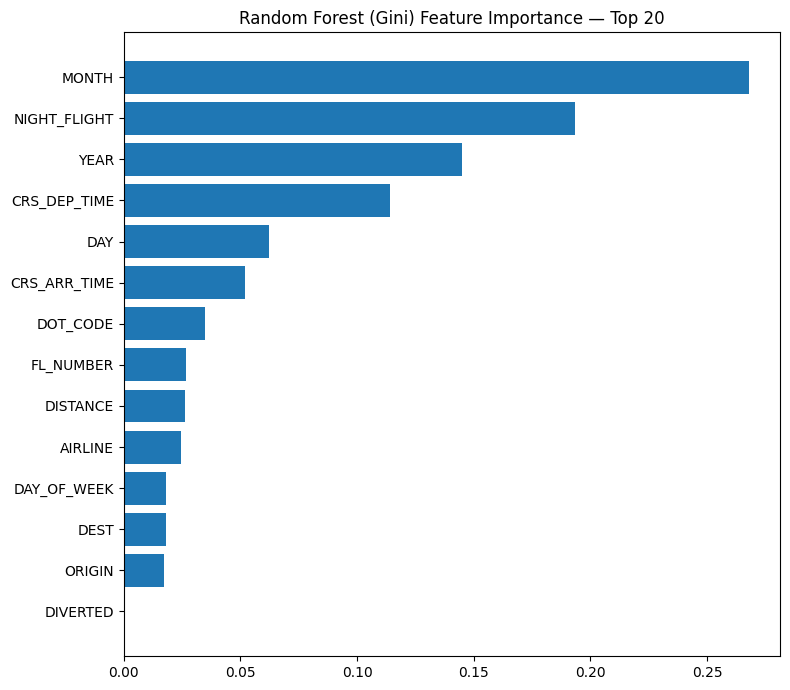

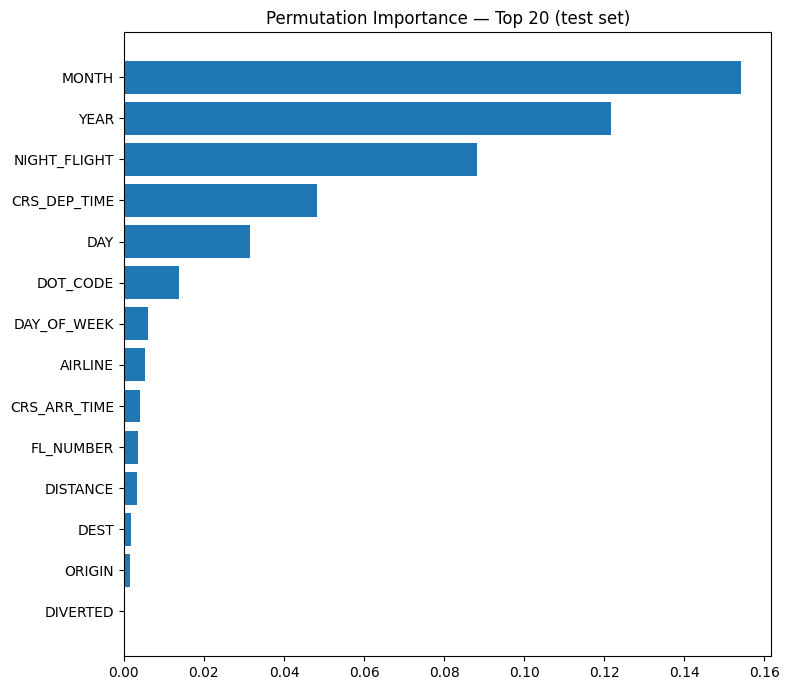

In [13]:
# Plot both rankings (top 20)
import matplotlib.pyplot as plt

top_k = 20
# Gini
plt.figure(figsize=(8, 7))
g_top = gini_tbl.head(top_k)[::-1]
plt.barh(g_top["feature"], g_top["gini_importance"])
plt.title("Random Forest (Gini) Feature Importance — Top 20")
plt.tight_layout()
plt.savefig("reports/figures/fi_gini_top20.png", dpi=200)
plt.show()

# Permutation
plt.figure(figsize=(8, 7))
p_top = perm_tbl.head(top_k)[::-1]
plt.barh(p_top["feature"], p_top["perm_importance_mean"])
plt.title("Permutation Importance — Top 20 (test set)")
plt.tight_layout()
plt.savefig("reports/figures/fi_permutation_top20.png", dpi=200)
plt.show()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


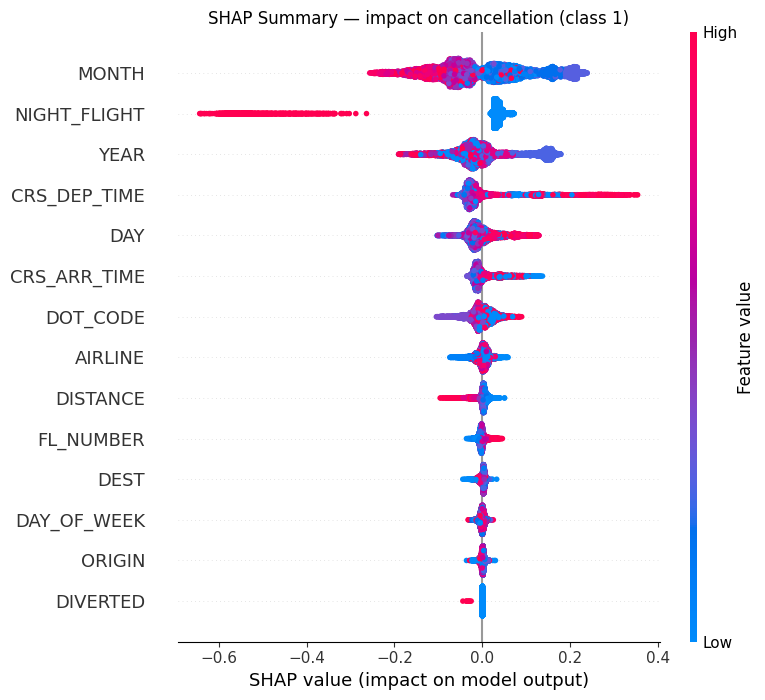

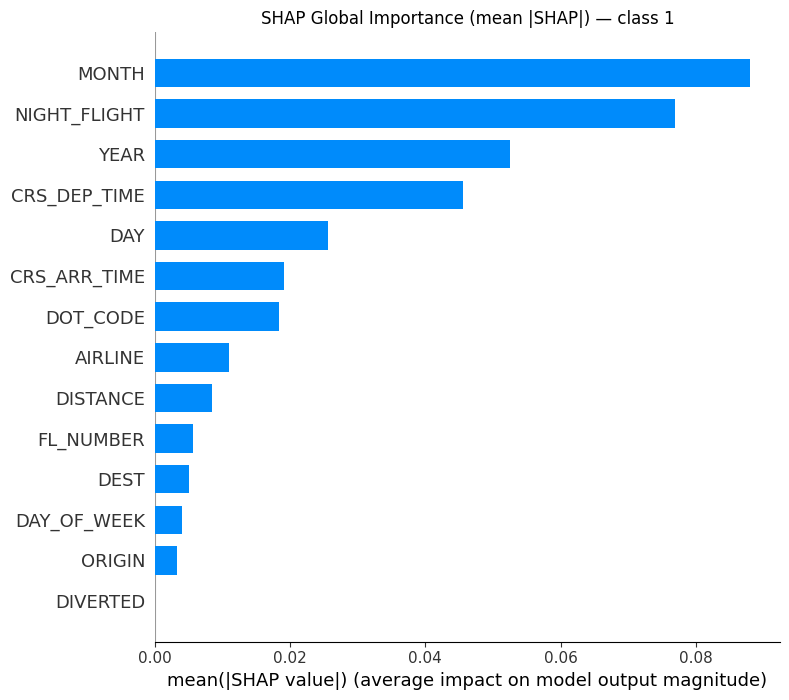

In [14]:
# SHAP: global & local explanations
## SHAP provides additive, human-readable attributions. For speed, we sample 10k rows.

import shap, numpy as np

# Sample for SHAP speed
sample_idx = np.random.RandomState(42).choice(len(X_test_c), size=min(10000, len(X_test_c)), replace=False)
X_shap = X_test_c.iloc[sample_idx]

explainer = shap.TreeExplainer(rf_cancel)
shap_values = explainer.shap_values(X_shap)   # list [class0, class1] for RF

# Use positive (class 1 = cancelled) contributions
sv_pos = shap_values[1]

# Global summary (beeswarm)
shap.summary_plot(sv_pos, X_shap, show=False)
plt.title("SHAP Summary — impact on cancellation (class 1)")
plt.tight_layout()
plt.savefig("reports/figures/shap_summary_beeswarm.png", dpi=200, bbox_inches='tight')
plt.show()

# Global bar
shap.summary_plot(sv_pos, X_shap, plot_type="bar", show=False)
plt.title("SHAP Global Importance (mean |SHAP|) — class 1")
plt.tight_layout()
plt.savefig("reports/figures/shap_summary_bar.png", dpi=200, bbox_inches='tight')
plt.show()

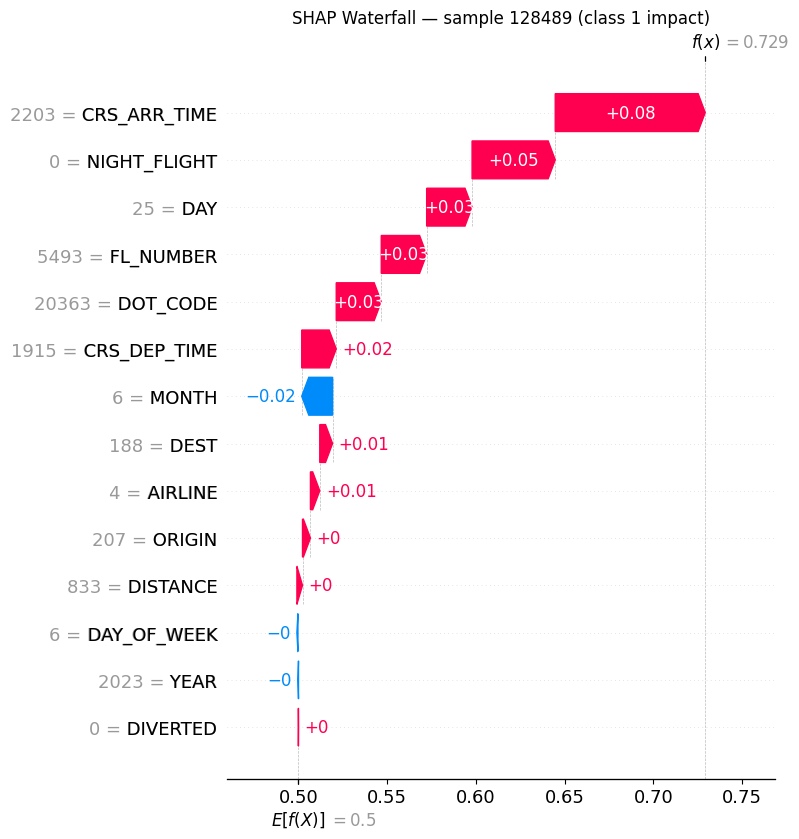

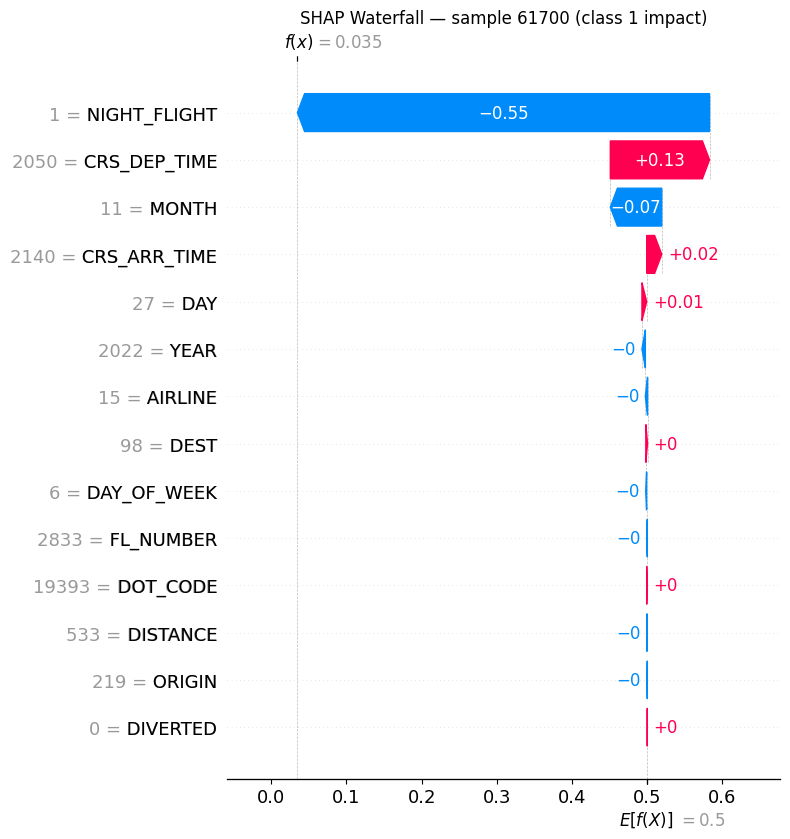

In [15]:
# Local explanation for a single flight (first 1–2 examples):
# Explain one cancelled and one non-cancelled if available
ix_cancel = X_test_c.index[(y_test_c == 1)][:1]
ix_keep   = X_test_c.index[(y_test_c == 0)][:1]

def explain_one(idx):
    x_row = X_test_c.loc[[idx]]
    sv = explainer.shap_values(x_row)[1]  # class 1
    shap.waterfall_plot(shap.Explanation(values=sv[0], base_values=explainer.expected_value[1], data=x_row.values[0], feature_names=feature_names), max_display=15, show=False)
    plt.title(f"SHAP Waterfall — sample {idx} (class 1 impact)")
    plt.tight_layout()
    plt.savefig(f"reports/figures/shap_waterfall_{idx}.png", dpi=200, bbox_inches='tight')
    plt.show()

for idx in list(ix_cancel) + list(ix_keep):
    explain_one(idx)

Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


<Figure size 600x400 with 0 Axes>

Creating legend with loc="best" can be slow with large amounts of data.


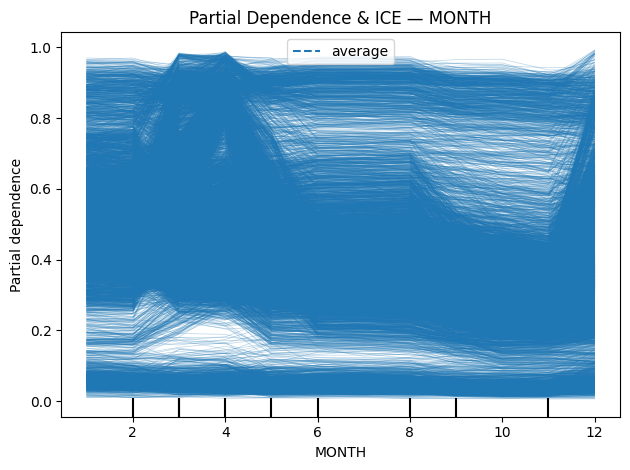

Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


<Figure size 600x400 with 0 Axes>

Creating legend with loc="best" can be slow with large amounts of data.


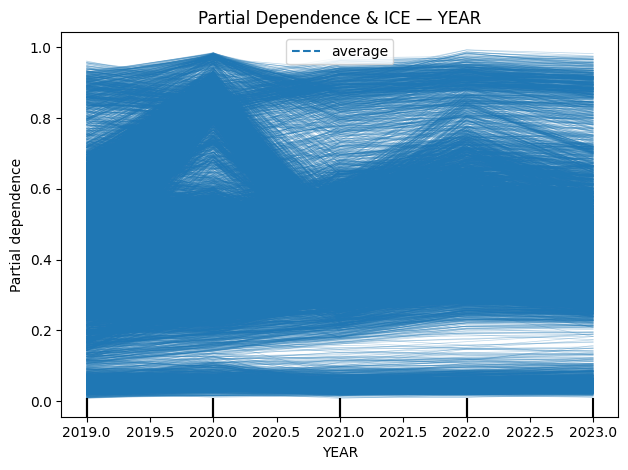

⚠️ Skipped NIGHT_FLIGHT: cannot reshape array of size 1 into shape (2)


Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


<Figure size 600x400 with 0 Axes>

<Figure size 600x400 with 0 Axes>

Creating legend with loc="best" can be slow with large amounts of data.


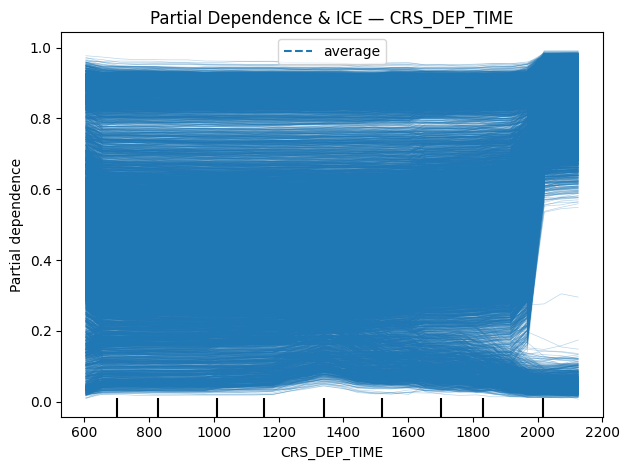

Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


<Figure size 600x400 with 0 Axes>

Creating legend with loc="best" can be slow with large amounts of data.


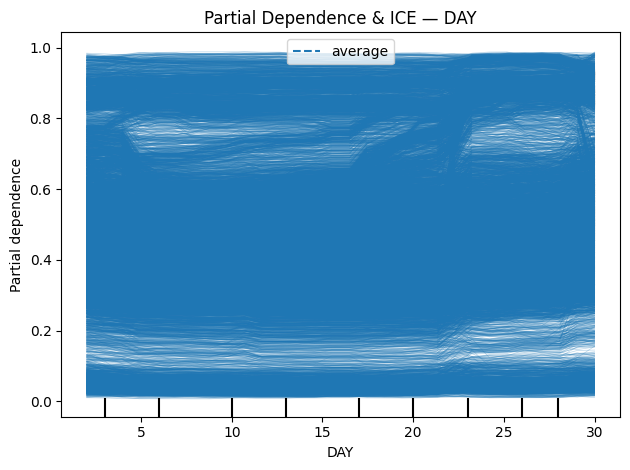

Creating legend with loc="best" can be slow with large amounts of data.
Creating legend with loc="best" can be slow with large amounts of data.


<Figure size 600x400 with 0 Axes>

Creating legend with loc="best" can be slow with large amounts of data.


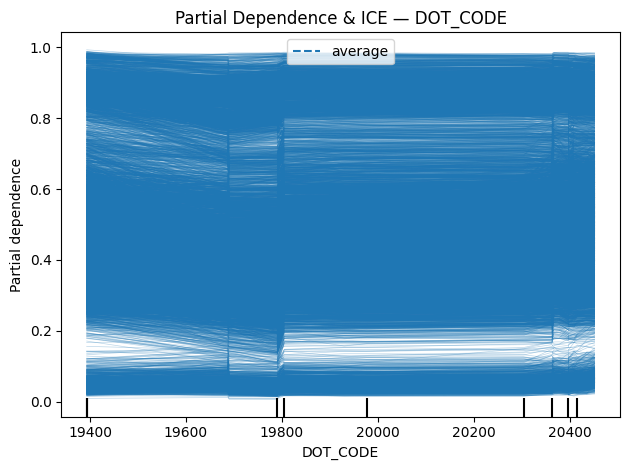

In [16]:
# Partial Dependence (PD) + ICE for top drivers
## Pick the top 4–6 from permutation importances (or SHAP bar).

from sklearn.inspection import PartialDependenceDisplay

top_feats = perm_tbl.head(6)["feature"].tolist()

for f in top_feats:
    try:
        fig = plt.figure(figsize=(6,4))
        PartialDependenceDisplay.from_estimator(
            rf_cancel, X_test_c, [f], kind='both', subsample=10000, grid_resolution=30
        )
        plt.title(f"Partial Dependence & ICE — {f}")
        plt.tight_layout()
        plt.savefig(f"reports/figures/pd_ice_{f}.png", dpi=200, bbox_inches='tight')
        plt.show()
    except Exception as e:
        print(f"⚠️ Skipped {f}: {e}")

In [ ]:
# Report stitcher
import os, glob, datetime
import pandas as pd
from pathlib import Path
from html import escape

os.makedirs("reports", exist_ok=True)
os.makedirs("reports/figures", exist_ok=True)
os.makedirs("reports/tables", exist_ok=True)

OUT = "reports/Shipaton_report.html"

def table_preview(path, n=10):
    try:
        df = pd.read_csv(path)
        head = df.head(n).to_html(index=False, escape=False)
        meta = f"{len(df):,} rows × {df.shape[1]} cols"
        return head, meta
    except Exception as e:
        return f"<em>Could not preview table: {escape(str(e))}</em>", ""

def section_for(prefix_label, fig_glob, tbl_glob):
    figs = sorted(glob.glob(fig_glob))
    tbls = sorted(glob.glob(tbl_glob))
    html = [f"<h2>{escape(prefix_label)}</h2>"]

    if tbls:
        html.append("<h3>Tables</h3>")
        html.append("<ul>")
        for t in tbls:
            name = Path(t).name
            preview, meta = table_preview(t, n=10)
            html.append(f"<li><details><summary><code>{escape(name)}</code> — {escape(meta)}</summary>{preview}<p><a href='{t}' download>Download CSV</a></p></details></li>")
        html.append("</ul>")
    else:
        html.append("<p><em>No tables found.</em></p>")

    if figs:
        html.append("<h3>Figures</h3>")
        for f in figs:
            name = Path(f).name
            html.append(f"<figure><img src='{f}' style='max-width:900px;width:100%;height:auto;border:1px solid #eee;border-radius:8px;padding:6px;' alt='{escape(name)}'><figcaption>{escape(name)}</figcaption></figure>")
    else:
        html.append("<p><em>No figures found.</em></p>")

    return "\n".join(html)

# Heuristics: treat filenames containing these prefixes as belonging to a bucket
buckets = [
    # Delay (clean, leakage-free)
    ("Delay (clean, leakage-free)",
     "reports/figures/delay_clean_*.*",
     "reports/tables/delay_clean_*.*"),

    # Delay (leakage) — include only if you generated them
    ("Delay (with leakage) — for comparison only",
     "reports/figures/delay_leakage_*.*",
     "reports/tables/delay_leakage_*.*"),

    # Cancellation (if you generated figures/tables with similar naming)
    ("Cancellation",
     "reports/figures/cancel_*.*",
     "reports/tables/cancel_*.*"),
]

styles = """
<style>
body { font-family: system-ui, -apple-system, Segoe UI, Roboto, Helvetica, Arial, sans-serif; margin: 24px; }
h1 { margin-bottom: 0; }
h2 { margin-top: 36px; }
code { background:#f6f8fa; padding:2px 6px; border-radius:4px; }
details { background:#fafafa; border:1px solid #eee; padding:8px 12px; border-radius:8px; margin:6px 0; }
summary { cursor:pointer; font-weight:600; }
figcaption { font-size: 0.9em; color:#666; padding:4px 2px 12px 2px; }
footer { margin-top: 48px; font-size:0.9em; color:#666; }
</style>
"""

parts = [f"""
<!doctype html>
<html><head><meta charset="utf-8"><title>Shipaton Report</title>{styles}</head>
<body>
<h1>Shipaton Explainability & Metrics Report</h1>
<p>Generated: {escape(datetime.datetime.now().isoformat(sep=' ', timespec='seconds'))}</p>
<hr>
"""]

for label, f_glob, t_glob in buckets:
    parts.append(section_for(label, f_glob, t_glob))

parts.append("""
<footer>
<p>Notes:</p>
<ul>
  <li>Delay model shown as <strong>clean, leakage-free</strong>. Any “leakage” model artifacts are for comparison only and not used in production/API.</li>
  <li>Figures: SHAP (beeswarm/bar), PD/ICE, and importances are meant to support your Devpost write-up and the app’s “Why this risk?” panel.</li>
</ul>
</footer>
</body></html>
""")

with open(OUT, "w", encoding="utf-8") as f:
    f.write("\n".join(parts))

print(f"✅ Wrote {OUT}")

-----
-----

In [2]:
# Load original raw dataset
df = pd.read_csv("data/flights_large.csv")
print("🔹 Original shape:", df.shape)
print("🔹 CANCELLED value counts:\n", df['CANCELLED'].value_counts(dropna=False))

🔹 Original shape: (3000000, 32)
🔹 CANCELLED value counts:
 CANCELLED
0.0    2920860
1.0      79140
Name: count, dtype: int64


In [3]:
# Filter rows with valid CANCELLED values (0 or 1 only)
df = df[df['CANCELLED'].isin([0, 1])]
print("🔸 After filtering invalid CANCELLED values:", df.shape)
print("🔸 CANCELLED counts:\n", df['CANCELLED'].value_counts())

🔸 After filtering invalid CANCELLED values: (3000000, 32)
🔸 CANCELLED counts:
 CANCELLED
0.0    2920860
1.0      79140
Name: count, dtype: int64


In [4]:
# Add binary missing flags
df['MISSING_AIR_TIME'] = df['AIR_TIME'].isna().astype(int)
df['MISSING_ELAPSED_TIME'] = df['ELAPSED_TIME'].isna().astype(int)
df['MISSING_CRS_ELAPSED_TIME'] = df['CRS_ELAPSED_TIME'].isna().astype(int)

In [5]:
# Fill relevant numerical columns with -1 to preserve rows (especially for CANCELLED = 1 cases)
df.fillna({
    'AIR_TIME': -1,
    'ELAPSED_TIME': -1,
    'CRS_ELAPSED_TIME': -1
}, inplace=True)

In [6]:
# Balance the classes
cancelled_0 = df[df['CANCELLED'] == 0]
cancelled_1 = df[df['CANCELLED'] == 1]

# Combine for balancing
print("✅ CANCELLED=0 count after BALANCE:", cancelled_0.shape)
print("✅ CANCELLED=1 count after BALANCE:", cancelled_1.shape)

✅ CANCELLED=0 count after BALANCE: (2920860, 35)
✅ CANCELLED=1 count after BALANCE: (79140, 35)


In [7]:
min_len = min(len(cancelled_0), len(cancelled_1))

# Randomly sample equal data from both classes
df_bal = pd.concat([
    cancelled_0.sample(min_len, random_state=42),
    cancelled_1.sample(min_len, random_state=42)
]).sample(frac=1, random_state=42).reset_index(drop=True)

print("🔸 After balancing:", df_bal.shape)
print("🔸 CANCELLED counts:\n", df_bal['CANCELLED'].value_counts())

🔸 After balancing: (158280, 35)
🔸 CANCELLED counts:
 CANCELLED
1.0    79140
0.0    79140
Name: count, dtype: int64


### Feature Engineering & ML Modeling Plan

In [8]:
# ✅ Date Features
df_bal['FL_DATE'] = pd.to_datetime(df_bal['FL_DATE'], errors='coerce')
df_bal['YEAR'] = df_bal['FL_DATE'].dt.year
df_bal['MONTH'] = df_bal['FL_DATE'].dt.month
df_bal['DAY'] = df_bal['FL_DATE'].dt.day
df_bal['DAY_OF_WEEK'] = df_bal['FL_DATE'].dt.dayofweek

In [9]:
# ✅ Optional Binary Features
df_bal['LONG_AIR_TIME'] = (df_bal['AIR_TIME'] > df_bal['AIR_TIME'].median()).astype(int)
df_bal['NIGHT_FLIGHT'] = ((df_bal['DEP_TIME'] >= 2000) | (df_bal['DEP_TIME'] <= 600)).astype(int)

In [10]:
# Encode categories
from sklearn.preprocessing import LabelEncoder

# ✅ Encode categories
for col in ['AIRLINE', 'ORIGIN', 'DEST']:
    df_bal[col] = LabelEncoder().fit_transform(df_bal[col].astype(str))

In [11]:
# Drop unneeded and leakage-prone columns
drop_cols = [
    'FL_DATE', 'CANCELLATION_CODE', 'DEP_DELAY', 'ARR_DELAY', 'WHEELS_OFF', 'WHEELS_ON',
    'TAXI_OUT', 'TAXI_IN', 'DELAY_DUE_CARRIER', 'DELAY_DUE_WEATHER', 'DELAY_DUE_NAS',
    'DELAY_DUE_SECURITY', 'DELAY_DUE_LATE_AIRCRAFT', 'DEP_TIME', 'ARR_TIME',
    'AIRLINE_DOT', 'AIRLINE_CODE', 'ORIGIN_CITY', 'DEST_CITY', 'IS_DELAYED',
    # ❌ Drop known leakage features (runtime info not available before flight)
    'AIR_TIME', 'ELAPSED_TIME', 'CRS_ELAPSED_TIME'
]

# ✅ Drop only those columns that exist in the dataframe
df_bal.drop(columns=[col for col in drop_cols if col in df_bal.columns], inplace=True)

print("🔸 Final dataset shape after dropping columns:", df_bal.shape)
print("🔸 Final CANCELLED value counts:\n", df_bal['CANCELLED'].value_counts())

🔸 Final dataset shape after dropping columns: (158280, 19)
🔸 Final CANCELLED value counts:
 CANCELLED
1.0    79140
0.0    79140
Name: count, dtype: int64


In [12]:
# Final Check Before Training
print("✅ Final missing values check:")
print(df_bal.isna().sum())

✅ Final missing values check:
AIRLINE                     0
DOT_CODE                    0
FL_NUMBER                   0
ORIGIN                      0
DEST                        0
CRS_DEP_TIME                0
CRS_ARR_TIME                0
CANCELLED                   0
DIVERTED                    0
DISTANCE                    0
MISSING_AIR_TIME            0
MISSING_ELAPSED_TIME        0
MISSING_CRS_ELAPSED_TIME    0
YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
LONG_AIR_TIME               0
NIGHT_FLIGHT                0
dtype: int64


In [15]:
!pip install seaborn==0.12.2

  Using cached seaborn-0.12.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.12.2-py3-none-any.whl (293 kB)
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.13.2
    Uninstalling seaborn-0.13.2:
      Successfully uninstalled seaborn-0.13.2


🔍 Correlation with CANCELLED:
 CANCELLED                   1.000000e+00
MISSING_AIR_TIME            9.978164e-01
MISSING_ELAPSED_TIME        9.978164e-01
DAY                         5.337203e-02
CRS_DEP_TIME                3.578580e-02
AIRLINE                     3.525494e-02
FL_NUMBER                   3.388251e-02
CRS_ARR_TIME                1.878616e-02
MISSING_CRS_ELAPSED_TIME    9.405247e-03
DAY_OF_WEEK                -1.581417e-17
DOT_CODE                   -1.201651e-02
DEST                       -1.266949e-02
ORIGIN                     -1.390618e-02
DIVERTED                   -3.307863e-02
DISTANCE                   -5.426394e-02
YEAR                       -5.767107e-02
MONTH                      -1.825804e-01
NIGHT_FLIGHT               -2.855821e-01
LONG_AIR_TIME              -9.978164e-01
Name: CANCELLED, dtype: float64


C:\Users\sweet\Desktop\DataScience\Github projects\Deployment files\Snowflake_Flight_Cancellation\flight_ml_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


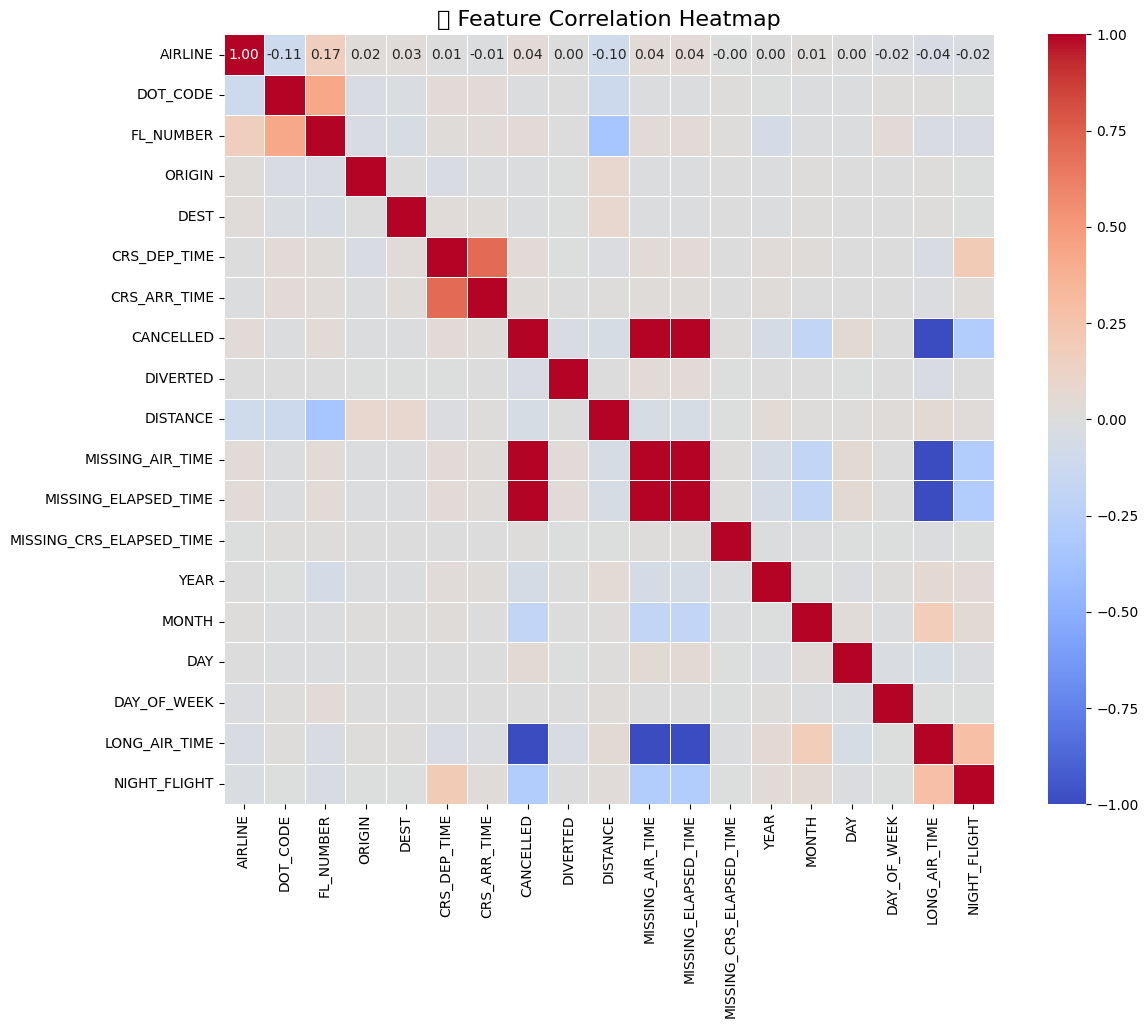

In [16]:
# Correlation Matrix and Heatmap

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_bal.corr(numeric_only=True)
print("🔍 Correlation with CANCELLED:\n", corr_matrix['CANCELLED'].sort_values(ascending=False))

plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
plt.title("📊 Feature Correlation Heatmap", fontsize=16)
plt.show()

In [17]:
df_bal.to_csv("data/flight_cancel_features.csv", index=False)
print("✅ Saved feature engineered cancellation dataset.")

✅ Saved feature engineered cancellation dataset.


In [18]:
from sklearn.model_selection import train_test_split
import numpy as np

df_bal = pd.read_csv("data/flight_cancel_features.csv")

In [19]:
# ✅ Define X, y
X = df_bal.drop(columns=['CANCELLED'])
y = df_bal['CANCELLED'].astype(int)

print("✅ Class distribution in y:")
print("y.value_counts():\n", y.value_counts())
print("np.bincount(y):", np.bincount(y))

✅ Class distribution in y:
y.value_counts():
 CANCELLED
1    79140
0    79140
Name: count, dtype: int64
np.bincount(y): [79140 79140]


In [22]:
# Train-test split with stratification
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X, y, stratify=y, test_size=0.33, random_state=42
)
print("✅ X_train_c shape:", X_train_c.shape)
print("✅ X_test_c shape:", X_test_c.shape)
print("✅ y_train_c distribution:", np.bincount(y_train_c))
print("✅ y_test_c distribution:", np.bincount(y_test_c))

✅ X_train_c shape: (106047, 18)
✅ X_test_c shape: (52233, 18)
✅ y_train_c distribution: [53023 53024]
✅ y_test_c distribution: [26117 26116]


In [21]:
# Save for deployment
import joblib
joblib.dump((X_train_c, X_test_c, y_train_c, y_test_c), "model/cancel_model_data.pkl")
print("✅ Split data saved.")

✅ Split data saved.


### Train the Cancellation Model

**Flight Cancellation Model**

→ RandomForestClassifier                                          
→ Target: CANCELLED

In [23]:
# === Model 1: Flight Cancellation (Random Forest) ===
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

In [ ]:
# Load split data
X_train_c, X_test_c, y_train_c, y_test_c = joblib.load("model/cancel_model_data.pkl")

print("✅ y_train_c class distribution:")
print("Train ->", np.bincount(y_train_c))  # Shows count of 0s and 1s

print("✅ y_test_c class distribution:")
print("Test  ->", np.bincount(y_test_c))   # Shows count of 0s and 1s

In [24]:
# Initialize model
from sklearn.ensemble import RandomForestClassifier

# Train model
rf_cancel = RandomForestClassifier(
    n_estimators=100, max_depth=10, random_state=42, class_weight='balanced'
)
rf_cancel.fit(X_train_c, y_train_c)

print("✅ Labels used in training:", np.bincount(y_train_c))

✅ Labels used in training: [53023 53024]


In [25]:
# Predict
y_pred_c = rf_cancel.predict(X_test_c)

print("✅ Predicted value counts:", np.bincount(y_pred_c))

✅ Predicted value counts: [26117 26116]


In [26]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation
print("\n🔍 Evaluation for Flight Cancellation Model")
print("\n🔍 Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c, labels=[0, 1]))

print("\n🔍 Classification Report:")
print(classification_report(y_test_c, y_pred_c))

print("✅ Accuracy:", accuracy_score(y_test_c, y_pred_c))


🔍 Evaluation for Flight Cancellation Model

🔍 Confusion Matrix:
[[26117     0]
 [    0 26116]]

🔍 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26117
           1       1.00      1.00      1.00     26116

    accuracy                           1.00     52233
   macro avg       1.00      1.00      1.00     52233
weighted avg       1.00      1.00      1.00     52233

✅ Accuracy: 1.0


In [ ]:
# Save trained model
import joblib

joblib.dump(rf_cancel, "model/rf_cancel_model.pkl")
print("✅ Final model saved: model/rf_cancel_model.pkl")